<a href="https://colab.research.google.com/github/JoshuaHildebrand/CMSC320_Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv('Popular_Spotify_Songs.csv', encoding='latin1')
display(df)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

# What is the distribution of Spotify, Apple, Shazam, and Deezer charts and How do These Variables Correlate?

In [9]:
import warnings
warnings.filterwarnings('ignore')

# Select Relevant Variables
charts_df = df[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']]

# Data Cleaning":
charts_df['in_shazam_charts'] = charts_df['in_shazam_charts'].astype(str)
# 'in_shazam_charts' have commas in numbers that must be removed.
charts_df['in_shazam_charts'] = charts_df['in_shazam_charts'].str.replace(',','',regex = False)
charts_df['in_shazam_charts'] = charts_df['in_shazam_charts'].astype(float)


In [10]:
charts_df.describe()

,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
count,952.000000,952.000000,952.000000,902.000000
mean,12.022059,51.963235,2.669118,60.062084
std,19.582405,50.628850,6.038152,161.238101
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,0.000000,0.000000
50%,3.000000,38.500000,0.000000,2.500000
75%,16.000000,87.000000,2.000000,37.000000
max,147.000000,275.000000,58.000000,1451.000000


In [11]:
df_corr = charts_df.corr().style.background_gradient(cmap='RdBu_r', vmin = -1, vmax = 1)
display(df_corr)


,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
in_spotify_charts,1.000000,0.551985,0.600101,0.602994
in_apple_charts,0.551985,1.000000,0.383443,0.434395
in_deezer_charts,0.600101,0.383443,1.000000,0.437628
in_shazam_charts,0.602994,0.434395,0.437628,1.000000


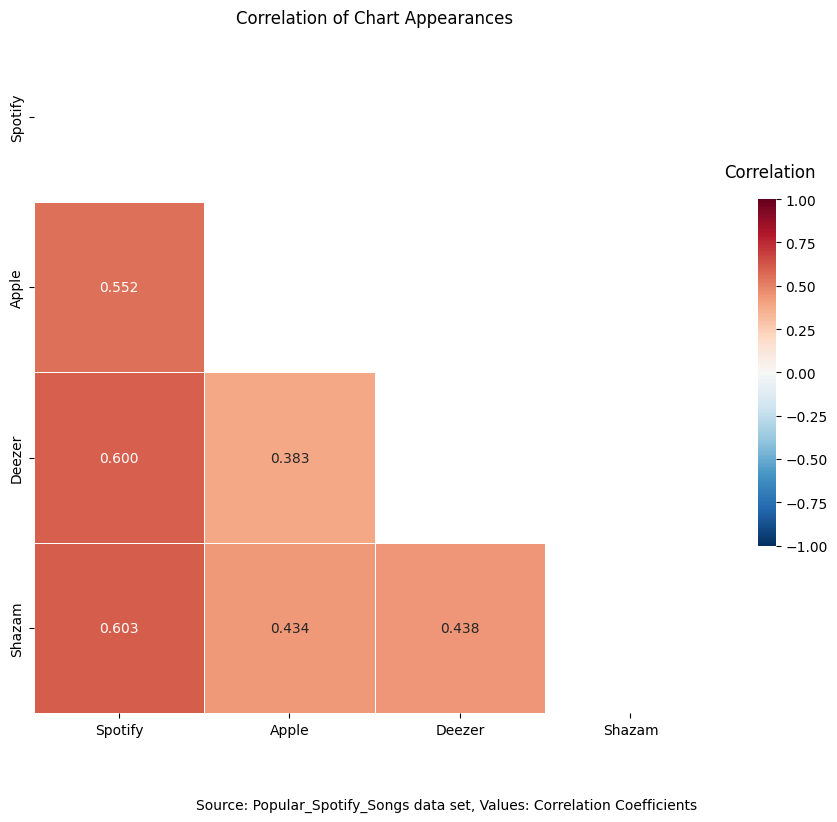

In [12]:
mask = np.triu(np.ones_like(charts_df.corr(), dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(charts_df.corr(), mask=mask, cmap='RdBu_r', vmax=1, vmin = -1,
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},
            fmt = '.3f', annot = True, label = 'Correlation')


caption = "Source: Popular_Spotify_Songs data set, Values: Correlation Coefficients"

plt.title('Correlation of Chart Appearances')
plt.legend(title = 'Correlation',bbox_to_anchor=(1.165, 0.825), frameon = False,
           title_fontsize = 'large')
ax.set_xticklabels(['Spotify', 'Apple', 'Deezer', 'Shazam'])
ax.set_yticklabels(['Spotify', 'Apple', 'Deezer', 'Shazam'])
plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center',
            fontsize=10)


plt.show()

**First Conclusion:**

Based on the describe command, the data clearly contains outliers meaning that using statistical methods that involve calculations using the mean will be inappropriate as the data is not normally distributed.

To best understand how the data in each music platform is related, the best statistical method to use is correlation. All the data is numeric, so computing correlation is an efficent way to answer the guiding question.

The correlation reveals that all music platform's charts are positively related. The strongest relationship is a correlation of 0.603 between Spotify and Shazam. Whereas the weakest relationship is between Apple and Deezer with a correlation of 0.384.

This insight these statistics show is that the count of songs in charts moves together across all platforms. If a song is in a high number of charts in one platform it is likely to be in a high number of charts in another platform.


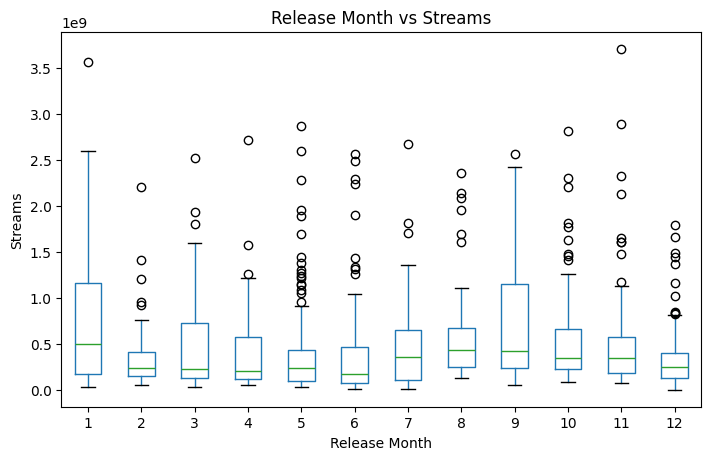

F-statistic: 4.795282070206737
p-value: 3.267617433013214e-07
    group1  group2      meandiff   p-adj         lower         upper  reject
0        1       2 -3.743526e+08  0.0009 -6.554398e+08 -9.326542e+07    True
2        1       4 -3.233602e+08  0.0065 -5.970507e+08 -4.966966e+07    True
3        1       5 -3.118371e+08  0.0004 -5.369085e+08 -8.676563e+07    True
4        1       6 -3.174615e+08  0.0023 -5.689846e+08 -6.593831e+07    True
10       1      12 -3.579327e+08  0.0005 -6.204188e+08 -9.544673e+07    True
17       2       9  3.814909e+08  0.0115  4.508390e+07  7.178978e+08    True
34       4       9  3.304984e+08  0.0496  2.467996e+05  6.607499e+08    True
41       5       9  3.189753e+08  0.0181  2.774210e+07  6.102085e+08    True
47       6       9  3.245997e+08  0.0331  1.247228e+07  6.367271e+08    True
62       9      12 -3.650710e+08  0.0111 -6.860983e+08 -4.404366e+07    True


In [13]:
df.dtypes
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df.isnull().sum()
# only 1 na value out of 953 for streams, so less than 5% so we should drop it
df = df.dropna(subset = ['streams'])
df['streams'] = df['streams'].astype(int)

# Conclusion 2: Does a certain release month lead to more streams?
# Plot release month and streams
df.boxplot(column='streams', by='released_month', figsize=(8,5))
plt.title("Release Month vs Streams")
plt.suptitle("")  # removes the automatic pandas subtitle
plt.xlabel("Release Month")
plt.ylabel("Streams")
plt.grid(False)
plt.show()

# Hypothesis Testing - using Anova
groups = [group['streams'].values for name, group in df.groupby('released_month')]

f_statistic, p_value = stats.f_oneway(*groups)
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Post-Hoc test for Anova
tukey_results = pairwise_tukeyhsd(
    endog=df['streams'],
    groups=df['released_month'],
    alpha=0.05
)
tukey_df = pd.DataFrame(
    data=tukey_results.summary().data[1:],
    columns=tukey_results.summary().data[0]
)
significant_results = tukey_df[tukey_df['reject'] == True]
print(significant_results)

Second Conclusion: The Second conclusion is looking at whether a songs release month affected the number of streams the song got. For this analysis we did an anova and an post-hoc test. We find that there is statistically significant eveidence that the release month affects the number of streams a song gets. We got a p-value of 3.267617433013214e-07 which is less than our alpha of 0.05. In the post-hoc Turkey test we have that the following month pairs are statistically different: (1,2), (1,4), (1,5), (1,6), (1,12), (2,9), (4,9), (5,9), (6,9), (9,12).

We chose an Anova test because we wanted to compare multiple means. We did have to remove one row of NA data, but it was less than 5% of the data.

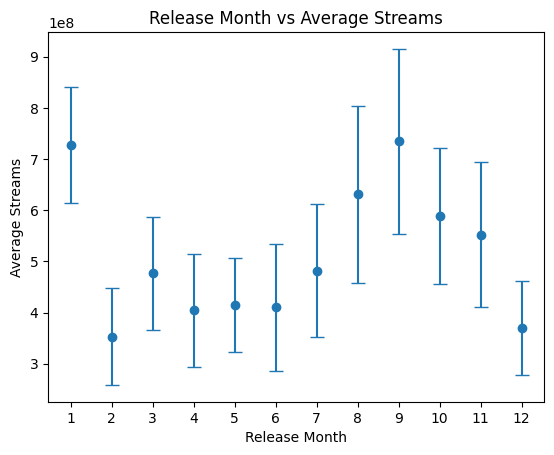

In [55]:
# Trying to create confidence intervals for ANOVA test, showing confidence
# intervals might be better than using boxplots since ANOVA tests means not
# Medians.



df_ANOVA = df[['streams','released_month']]

df_95conf = df_ANOVA.groupby('released_month')['streams'].mean().reset_index(name='mean')
df_95conf['std_error'] = df_ANOVA.groupby('released_month')['streams'].sem().values


df_95conf['n'] = df_ANOVA.groupby('released_month').size().values

df_95conf['t_stat'] = stats.t.ppf(0.975, df_95conf['n'] - 1)


plt.errorbar(df_95conf['released_month'], df_95conf['mean'],
             yerr=df_95conf['std_error']*df_95conf['t_stat'],
             fmt='o', capsize=5)
plt.title('Release Month vs Average Streams')
plt.xlabel('Release Month')
plt.ylabel('Average Streams')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_yticklabels(['1*10^8','2*10^8','3*10^8','4*10^8'])

plt.show()
